# credit_worthiness analysis

In [53]:
%matplotlib notebook

In [54]:
%matplotlib inline

In [55]:
import pandas as pd
#import pandas_profiling
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.feature_selection import SelectFromModel

In [56]:
df = pd.read_csv('german.data', delim_whitespace= True, header = None)  # load data as data frame

In [57]:
print(df.shape)  #Check data shape

(1000, 21)


In [58]:
headers = ['Checking account', 'Duration month', 'Credit history', 'Purpose', 'Credit amount', 
           'Savings account', 'Present employment', 'Installment rate',
           'Status and sex', 'Other debtors', 'Present residence', 'Property', 'Age', 
           'Other installment', 'Housing', 'Existing credits', 'Job', 
           'Maintenance', 'Telephone', 'Foreign worker', 'Risk']

In [59]:
df.columns = headers  #Set headers

In [60]:
df.isnull().sum()  #Check null values

Checking account      0
Duration month        0
Credit history        0
Purpose               0
Credit amount         0
Savings account       0
Present employment    0
Installment rate      0
Status and sex        0
Other debtors         0
Present residence     0
Property              0
Age                   0
Other installment     0
Housing               0
Existing credits      0
Job                   0
Maintenance           0
Telephone             0
Foreign worker        0
Risk                  0
dtype: int64

In [61]:
df.nunique()  #Check number of unique values in each column

Checking account        4
Duration month         33
Credit history          5
Purpose                10
Credit amount         921
Savings account         5
Present employment      5
Installment rate        4
Status and sex          4
Other debtors           3
Present residence       4
Property                4
Age                    53
Other installment       3
Housing                 3
Existing credits        4
Job                     4
Maintenance             2
Telephone               2
Foreign worker          2
Risk                    2
dtype: int64

In [62]:
df.describe() #Data description

,Duration month,Credit amount,Installment rate,Present residence,Age,Existing credits,Maintenance,Risk
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


In [63]:
df.Risk = abs(df.Risk -2) # representing 1 as good and 0 as bad

In [64]:
df.head(5) # Show first five rows

,Checking account,Duration month,Credit history,Purpose,Credit amount,Savings account,Present employment,Installment rate,Status and sex,Other debtors,...,Property,Age,Other installment,Housing,Existing credits,Job,Maintenance,Telephone,Foreign worker,Risk
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,0
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,0


## EDA:Exploratory Data Analysis

In [65]:
# Question 3(b): Are young people more credit worthy? 

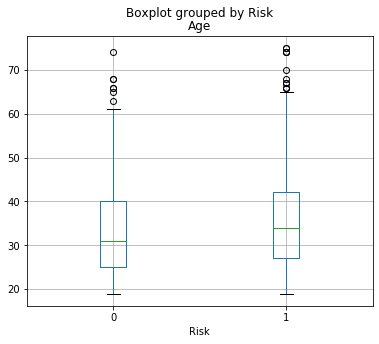

In [67]:
df.boxplot(column = 'Age', by = 'Risk', figsize = (6,5), fontsize= 10) #Boxplot for Age vs Risk


In [68]:
#Answer 3(b): From the above boxplot, we see that the median age value for bad records is lesser than that of good records.
#So,it would be wrong to say that young people would be more credit worthy as the risk could be high.   


In [69]:
# Question 3(c): Would a person with more credit accounts, be more credit worthy?

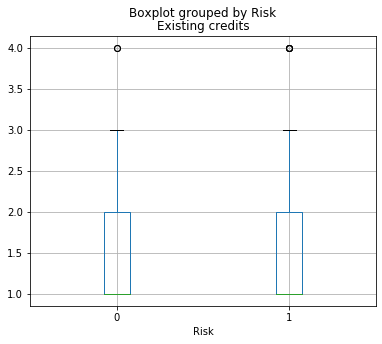

In [70]:
df.boxplot(column = 'Existing credits', by = 'Risk', figsize = (6,5), fontsize= 10) #Boxplot for number of credits vs Risk


In [71]:
# Answer 3(c): From the above boxplot we can not necessarily say that a person with more credit accounts is more credit worthy.

In [72]:
# Question 3(a): Would a person with critical credit history, be more credit worthy? 

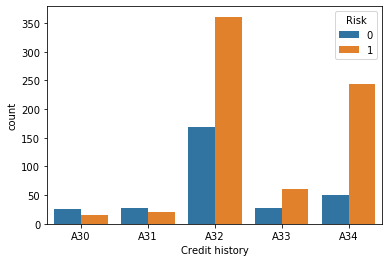

In [73]:
sns.countplot(x = 'Credit history', hue = 'Risk', data = df, order = ['A30','A31','A32','A33','A34']) 


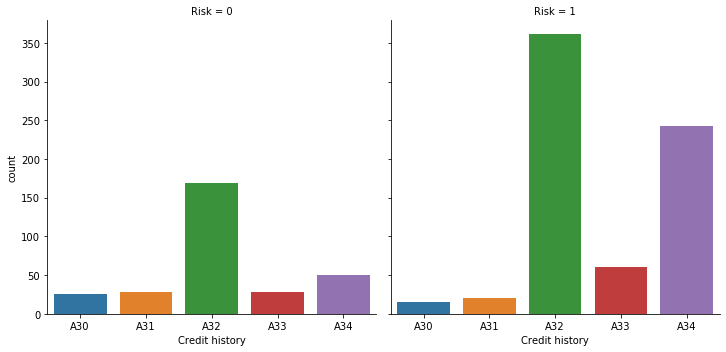

In [74]:
sns.catplot(x= 'Credit history', kind = 'count',col = 'Risk', data = df, order = ['A30','A31','A32','A33','A34'])


In [75]:
# Answer 3(a): From the above bar plot, we can say that a person with critical credit_history might be more credit 
#worthy compared to other categories.
#This is because A30 and A31 has more bad credit records than good ones, while A34 has four times more good records 
#than bad ones. Also A34 has the 2nd most number of good records.

## Data Preprocessing

In [76]:
# Convert all categorical values into numerical values.

In [77]:
le = LabelEncoder()
df['Checking account'] = le.fit_transform(df['Checking account'])
df['Credit history'] = le.fit_transform(df['Credit history'])
df['Purpose'] = le.fit_transform(df['Purpose'])
df['Savings account'] = le.fit_transform(df['Savings account'])
df['Present employment'] = le.fit_transform(df['Present employment'])
df['Status and sex'] = le.fit_transform(df['Status and sex'])
df['Other debtors'] = le.fit_transform(df['Other debtors'])
df['Property'] = le.fit_transform(df['Property'])
df['Other installment'] = le.fit_transform(df['Other installment'])
df['Housing'] = le.fit_transform(df['Housing'])
df['Job'] = le.fit_transform(df['Job'])
df['Telephone'] = le.fit_transform(df['Telephone'])
df['Foreign worker'] = le.fit_transform(df['Foreign worker'])

In [78]:
df.head(5)

,Checking account,Duration month,Credit history,Purpose,Credit amount,Savings account,Present employment,Installment rate,Status and sex,Other debtors,...,Property,Age,Other installment,Housing,Existing credits,Job,Maintenance,Telephone,Foreign worker,Risk
0,0,6,4,4,1169,4,4,4,2,0,...,0,67,2,1,2,2,1,1,0,1
1,1,48,2,4,5951,0,2,2,1,0,...,0,22,2,1,1,2,1,0,0,0
2,3,12,4,7,2096,0,3,2,2,0,...,0,49,2,1,1,1,2,0,0,1
3,0,42,2,3,7882,0,3,2,2,2,...,1,45,2,2,1,2,2,0,0,1
4,0,24,3,0,4870,0,2,3,2,0,...,3,53,2,2,2,2,2,0,0,0


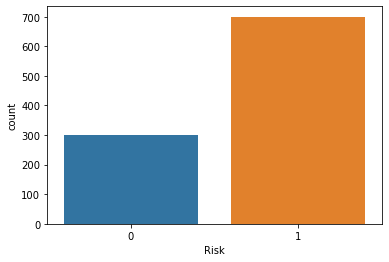

In [82]:
sns.countplot('Risk', data = df) # Check count for bad (0) and good (1) credit rows
plt.show()

In [83]:
# Heatplot to check feature correlation

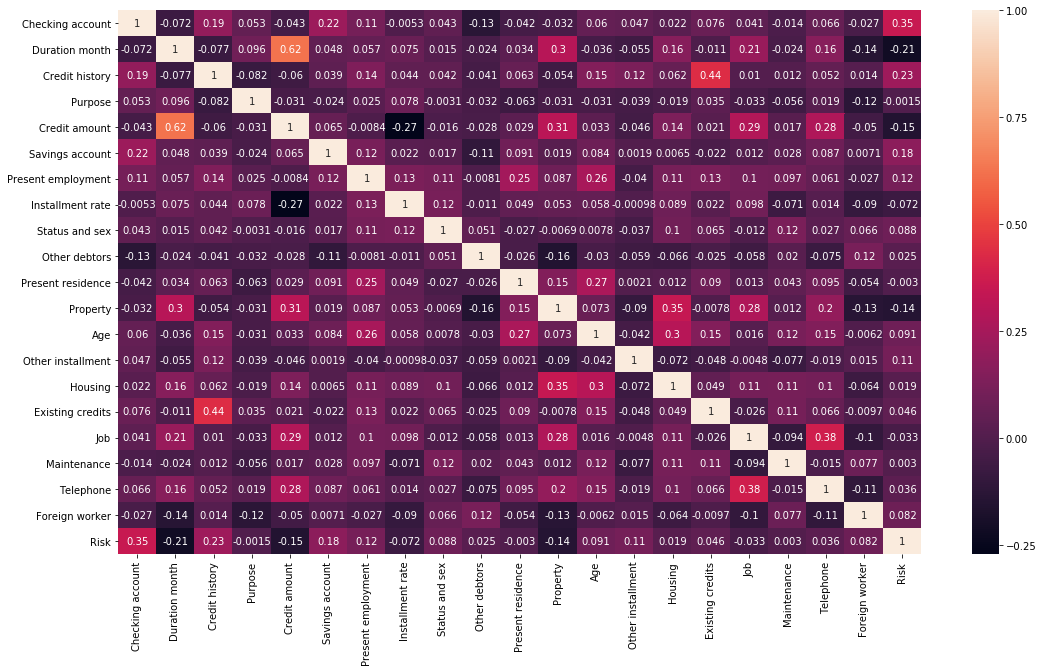

In [84]:
corr = df.corr()
plt.figure(figsize=(18,10))
sns.heatmap(corr, annot = True)
plt.show()

In [85]:
df.drop("Risk", axis=1).apply(lambda x: x.corr(df.Risk)) # feature correlation values with Risk column

Checking account      0.350847
Duration month       -0.214927
Credit history        0.228785
Purpose              -0.001514
Credit amount        -0.154739
Savings account       0.178943
Present employment    0.116002
Installment rate     -0.072404
Status and sex        0.088184
Other debtors         0.025137
Present residence    -0.002967
Property             -0.142612
Age                   0.091127
Other installment     0.109844
Housing               0.019315
Existing credits      0.045732
Job                  -0.032735
Maintenance           0.003015
Telephone             0.036466
Foreign worker        0.082079
dtype: float64

In [87]:
#New dataframe for feature selection without target column
df_t = df.drop('Risk', axis = 1)
df_t.head(5)

,Checking account,Duration month,Credit history,Purpose,Credit amount,Savings account,Present employment,Installment rate,Status and sex,Other debtors,Present residence,Property,Age,Other installment,Housing,Existing credits,Job,Maintenance,Telephone,Foreign worker
0,0,6,4,4,1169,4,4,4,2,0,4,0,67,2,1,2,2,1,1,0
1,1,48,2,4,5951,0,2,2,1,0,2,0,22,2,1,1,2,1,0,0
2,3,12,4,7,2096,0,3,2,2,0,3,0,49,2,1,1,1,2,0,0
3,0,42,2,3,7882,0,3,2,2,2,4,1,45,2,2,1,2,2,0,0
4,0,24,3,0,4870,0,2,3,2,0,4,3,53,2,2,2,2,2,0,0


In [88]:
#Feature removal with low variance using variance threshold from sklearn.feture selection.
#For example, we want to remove all features that has same value in more than 80% of the samples.

In [89]:
df_tn = df_t.loc[:, VarianceThreshold(threshold=(.8 * (1 - .8))).fit(df_t).get_support()]
df_tn.head(5)

,Checking account,Duration month,Credit history,Purpose,Credit amount,Savings account,Present employment,Installment rate,Status and sex,Other debtors,Present residence,Property,Age,Other installment,Housing,Existing credits,Job,Telephone
0,0,6,4,4,1169,4,4,4,2,0,4,0,67,2,1,2,2,1
1,1,48,2,4,5951,0,2,2,1,0,2,0,22,2,1,1,2,0
2,3,12,4,7,2096,0,3,2,2,0,3,0,49,2,1,1,1,0
3,0,42,2,3,7882,0,3,2,2,2,4,1,45,2,2,1,2,0
4,0,24,3,0,4870,0,2,3,2,0,4,3,53,2,2,2,2,0


In [90]:
df_tn.shape   # Removed two columns Maintenance and Foreign worker for low variance

(1000, 18)

In [91]:
# 10 best feature selection using sklearn.selectkbest chi2
df_tnc = df_tn.loc[:, SelectKBest(chi2, k=10).fit(df_tn, df['Risk']).get_support()]

In [92]:
df_tnc.head(5)

,Checking account,Duration month,Credit history,Credit amount,Savings account,Present employment,Status and sex,Property,Age,Other installment
0,0,6,4,1169,4,4,2,0,67,2
1,1,48,2,5951,0,2,1,0,22,2
2,3,12,4,2096,0,3,2,0,49,2
3,0,42,2,7882,0,3,2,1,45,2
4,0,24,3,4870,0,2,2,3,53,2


In [93]:
df_tnc.shape

(1000, 10)

In [94]:
df_tnc.nunique()

Checking account        4
Duration month         33
Credit history          5
Credit amount         921
Savings account         5
Present employment      5
Status and sex          4
Property                4
Age                    53
Other installment       3
dtype: int64

## PCA for data visualization

In [95]:
# Data normalization using standardscalar from sklearn.preprocessing
features = list(df_tnc)
x = df.loc[:,features].values
y = df.loc[:,['Risk']].values #target var

X = StandardScaler().fit_transform(df_tnc) 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [96]:
pd.DataFrame(data = X, columns = features).head()

,Checking account,Duration month,Credit history,Credit amount,Savings account,Present employment,Status and sex,Property,Age,Other installment
0,-1.254566,-1.236478,1.344014,-0.745131,1.833169,1.338078,0.449326,-1.293723,2.766456,0.460831
1,-0.459026,2.248194,-0.503428,0.949817,-0.699707,-0.317959,-0.963650,-1.293723,-1.191404,0.460831
2,1.132053,-0.738668,1.344014,-0.416562,-0.699707,0.510060,0.449326,-1.293723,1.183312,0.460831
3,-1.254566,1.750384,-0.503428,1.634247,-0.699707,0.510060,0.449326,-0.341055,0.831502,0.460831
4,-1.254566,0.256953,0.420293,0.566664,-0.699707,-0.317959,0.449326,1.564281,1.535122,0.460831


In [97]:
# PCA Projection to 2D

In [98]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform (X)
principalDf = pd.DataFrame(data = principalComponents, columns=['PC1','PC2','PC3']) #PC = Principal component 
principalDf.head()

,PC1,PC2,PC3
0,-1.600255,2.607092,1.150063
1,1.299571,-1.621518,-1.268672
2,-1.627242,1.577940,-0.004959
3,2.053418,-0.328654,0.439728
4,1.199061,0.098257,0.872553


In [99]:
finalDf = pd.concat([principalDf,df[['Risk']]], axis = 1)
finalDf.head()

,PC1,PC2,PC3,Risk
0,-1.600255,2.607092,1.150063,1
1,1.299571,-1.621518,-1.268672,0
2,-1.627242,1.577940,-0.004959,1
3,2.053418,-0.328654,0.439728,1
4,1.199061,0.098257,0.872553,0


## Visualize the data in 2D

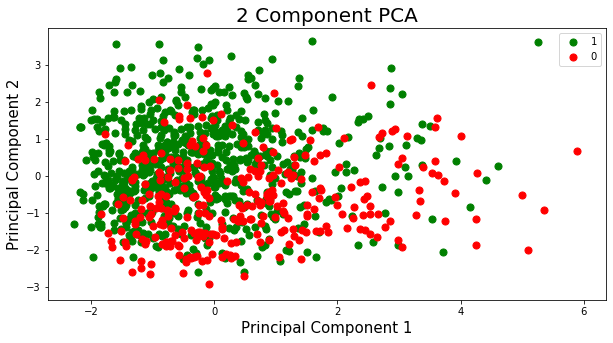

In [100]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

targets = [1,0]

colors = ['g','r']

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Risk'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
plt.show()

In [101]:
pca.explained_variance_ratio_.cumsum() # With k=3 around 99% of the variance is retained

array([0.19007009, 0.3474709 , 0.45991171])

### Split into train and test set , classification

In [114]:
#Select the Dependent(target) and Independent Variables:
y = df['Risk']
X = df_tnc

In [115]:
X.shape

(1000, 10)

In [116]:
X.head(5)

,Checking account,Duration month,Credit history,Credit amount,Savings account,Present employment,Status and sex,Property,Age,Other installment
0,0,6,4,1169,4,4,2,0,67,2
1,1,48,2,5951,0,2,1,0,22,2
2,3,12,4,2096,0,3,2,0,49,2
3,0,42,2,7882,0,3,2,1,45,2
4,0,24,3,4870,0,2,2,3,53,2


In [117]:
#Split the dataset into train and test dataset.
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [118]:
X_train.shape

(800, 10)

In [119]:
Scaler_X = StandardScaler() #Normalize
X_train = Scaler_X.fit_transform(X_train)
X_test = Scaler_X.transform(X_test)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [120]:
y_test.value_counts()

1    141
0     59
Name: Risk, dtype: int64

## MODELS

## Random Forest Classifier

In [121]:
rfc_clf = RandomForestClassifier()
params = {'n_estimators':[25,50,100,150,200,500],'max_depth':[0.5,1,5,10],'random_state':[1,10,20,42],
          'n_jobs':[1,2]}
grid_search_cv = GridSearchCV(rfc_clf, params, scoring='precision')
grid_search_cv.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [25, 50, 100, 150, 200, 500], 'max_depth': [0.5, 1, 5, 10], 'random_state': [1, 10, 20, 42], 'n_jobs': [1, 2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='precision', verbose=0)

In [122]:
print(grid_search_cv.best_estimator_)
print(grid_search_cv.best_params_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)
{'max_depth': 10, 'n_estimators': 100, 'n_jobs': 1, 'random_state': 42}


In [123]:
rfc_clf = grid_search_cv.best_estimator_
rfc_clf.fit(X_train,y_train)
rfc_clf_pred = rfc_clf.predict(X_test)
print('Accuracy:',accuracy_score(rfc_clf_pred,y_test) )
print('Confusion Matrix:', confusion_matrix(rfc_clf_pred,y_test).ravel()) #tn,fp,fn,tp
print('Classification report:')
print(classification_report(rfc_clf_pred,y_test))

# Let's make sure the data is not overfitting
score_rfc = cross_val_score(rfc_clf,X_train,y_train,cv = 10).mean()
print('cross val score:', score_rfc)

Accuracy: 0.795
Confusion Matrix: [ 28  10  31 131]
Classification report:
              precision    recall  f1-score   support

           0       0.47      0.74      0.58        38
           1       0.93      0.81      0.86       162

   micro avg       0.80      0.80      0.80       200
   macro avg       0.70      0.77      0.72       200
weighted avg       0.84      0.80      0.81       200

cross val score: 0.7687734411626816


## Support Vector Classifier

In [124]:
params = {'C': [0.75, 0.85, 0.95, 1], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 
          'degree': [3, 4, 5]}

svc_clf = SVC(probability=True,random_state=42)
grid_search_cv = GridSearchCV(svc_clf, params)
grid_search_cv.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=True, random_state=42,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.75, 0.85, 0.95, 1], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'degree': [3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [125]:
print(grid_search_cv.best_estimator_)
print(grid_search_cv.best_params_)

SVC(C=0.95, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=True, random_state=42,
  shrinking=True, tol=0.001, verbose=False)
{'C': 0.95, 'degree': 3, 'kernel': 'linear'}


In [126]:
svc_clf = grid_search_cv.best_estimator_
svc_clf.fit(X_train,y_train)
svc_pred = svc_clf.predict(X_test)

print('Accuracy:',accuracy_score(svc_pred,y_test) )
print('Confusion Matrix:', confusion_matrix(svc_pred,y_test,labels=[0,1])) #tn,fp,fn,tp
print('Classification report:')
print(classification_report(svc_pred,y_test))

# Let's make sure the data is not overfitting
score_svc = cross_val_score(svc_clf,X_train,y_train, cv = 10).mean()
print('cross val score:', score_svc)

Accuracy: 0.78
Confusion Matrix: [[ 25  10]
 [ 34 131]]
Classification report:
              precision    recall  f1-score   support

           0       0.42      0.71      0.53        35
           1       0.93      0.79      0.86       165

   micro avg       0.78      0.78      0.78       200
   macro avg       0.68      0.75      0.69       200
weighted avg       0.84      0.78      0.80       200

cross val score: 0.7426172058134084


## Logistic Regression

In [127]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)

print('Accuracy:',accuracy_score(lr_pred,y_test) )
print('Confusion Matrix:', confusion_matrix(lr_pred,y_test,labels=[0,1])) #tn,fp,fn,tp
print('Classification report:')
print(classification_report(lr_pred,y_test))

# Let's make sure the data is not overfitting
score_lr = cross_val_score(lr,X_train,y_train,cv=10).mean()
print('cross val score:', score_lr)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

Accuracy: 0.775
Confusion Matrix: [[ 24  10]
 [ 35 131]]
Classification report:
              precision    recall  f1-score   support

           0       0.41      0.71      0.52        34
           1       0.93      0.79      0.85       166

   micro avg       0.78      0.78      0.78       200
   macro avg       0.67      0.75      0.68       200
weighted avg       0.84      0.78      0.80       200

cross val score: 0.7488201281450226


In [128]:
models = pd.DataFrame({'Models':['Random Forest Classifier', 
                                 'Support Vector Classifier','Logistic Regression'],
                      'Score':[score_rfc,score_svc,score_lr]})
models.sort_values(by='Score', ascending = False)

,Models,Score
0,Random Forest Classifier,0.768773
2,Logistic Regression,0.748820
1,Support Vector Classifier,0.742617


## ROC and AUC curve

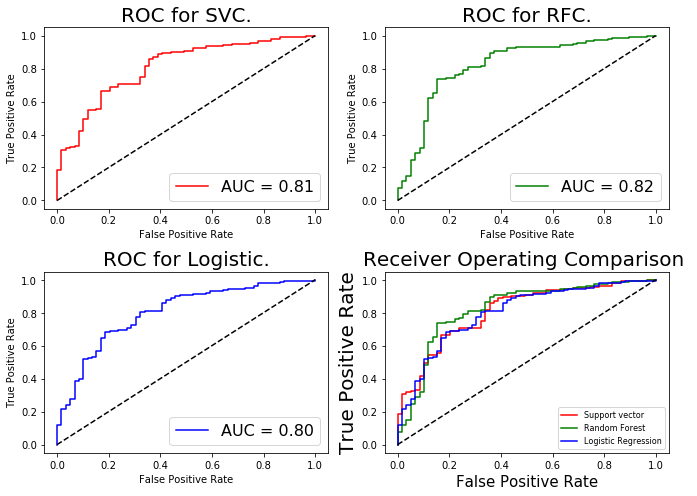

In [129]:
fig, ax_arr = plt.subplots(nrows = 2, ncols = 2, figsize = (10,7))

svc_prob = svc_clf.predict_proba(X_test)[:,1]
fprsvc, tprsvc, thresholdssvc = metrics.roc_curve(y_test, svc_prob)
roc_auc_svc = metrics.auc(fprsvc,tprsvc)
ax_arr[0,0].plot(fprsvc, tprsvc,'b',label = 'AUC = %0.2f' % roc_auc_svc,color = 'red')
ax_arr[0,0].plot([0, 1], [0, 1], 'k--')
ax_arr[0,0].set_xlabel('False Positive Rate')
ax_arr[0,0].set_ylabel('True Positive Rate')
ax_arr[0,0].set_title('ROC for SVC.', fontsize = 20)
ax_arr[0,0].legend(loc = 'lower right', prop={'size': 16})

#Random forest
rfc_prob = rfc_clf.predict_proba(X_test)[:,1]
fprRfc, tprRfc, thresholdsRfc = metrics.roc_curve(y_test, rfc_prob)
roc_auc_rfc = metrics.auc(fprRfc,tprRfc)
ax_arr[0,1].plot(fprRfc, tprRfc,'b',label = 'AUC = %0.2f' % roc_auc_rfc,color = 'green')
ax_arr[0,1].plot([0, 1], [0, 1], 'k--')
ax_arr[0,1].set_xlabel('False Positive Rate')
ax_arr[0,1].set_ylabel('True Positive Rate')
ax_arr[0,1].set_title('ROC for RFC.', fontsize = 20)
ax_arr[0,1].legend(loc = 'lower right', prop={'size': 16})

#Logistic Regression
lr_prob = lr.predict_proba(X_test)[:,1]
fprLr, tprLr, thresholdsLr = metrics.roc_curve(y_test, lr_prob)
roc_auc_lr = metrics.auc(fprLr,tprLr)
ax_arr[1,0].plot(fprLr, tprLr,'b',label = 'AUC = %0.2f' % roc_auc_lr,color = 'blue')
ax_arr[1,0].plot([0, 1], [0, 1], 'k--')
ax_arr[1,0].set_xlabel('False Positive Rate')
ax_arr[1,0].set_ylabel('True Positive Rate')
ax_arr[1,0].set_title('ROC for Logistic.', fontsize = 20)
ax_arr[1,0].legend(loc = 'lower right', prop={'size': 16})

#For All
ax_arr[1,1].plot(fprsvc,tprsvc, label ='Support vector', color = 'red')
ax_arr[1,1].plot(fprRfc,tprRfc, label ='Random Forest', color = 'green')
ax_arr[1,1].plot(fprLr,tprLr, label ='Logistic Regression', color = 'blue')
ax_arr[1,1].plot([0, 1], [0, 1], 'k--')
ax_arr[1,1].set_title('Receiver Operating Comparison ',fontsize=20)
ax_arr[1,1].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,1].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,1].legend(loc = 'lower right', prop={'size': 8})

plt.subplots_adjust(wspace=0.2)
plt.tight_layout() 
plt.show()

In [130]:
# Question 6: Which model would you choose and why? 
#Answer 6: Random forest seems to be the best model here as per the cross val scores. 
#Also, area under the ROC curve which represents accuracy is highest for random forest.

### Find best features as per model of importance

In [131]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_train, y_train)
print(sel.get_support())
selected_feat= df_tnc.columns[(sel.get_support())]
len(selected_feat)
print('selected_feat:\n', selected_feat)
feature_importances = pd.DataFrame(rfc_clf.feature_importances_,
                                   index = df_tnc.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
print('feature_importances:\n', feature_importances)

[ True  True False  True False False False False  True False]
selected_feat:
 Index(['Checking account', 'Duration month', 'Credit amount', 'Age'], dtype='object')
feature_importances:
                     importance
Credit amount         0.199398
Age                   0.148032
Checking account      0.145622
Duration month        0.131131
Credit history        0.088073
Present employment    0.067106
Property              0.066959
Savings account       0.061491
Status and sex        0.051945
Other installment     0.040243


In [132]:
# Question 7: Which are the top 3 features according to the selected model importance?
#Answer 7: 'Credit amount', 'Age' ,'Checking account', are the top 3 features.

In [133]:
# Question 8: Based on the selected model, provide a description of the “best” credit-worthy person.

#Answer 8: The best credit worthy person will have the following attributes as per the below plots:
# 1. checking account status  .. >= 200 DM or no checking account
# 2. Credit amount... less than 3000
# 3. Age should be above 40 years


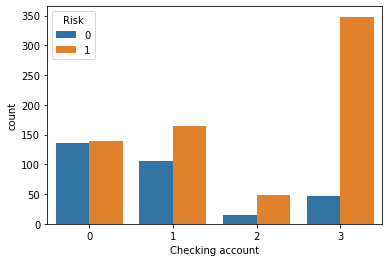

In [134]:
sns.countplot(x ='Checking account', hue = 'Risk', data = df, order = [0,1,2,3]) #count plot of checking account types vs Risk
#A11, A12, A13, A14 are presented along x axis as 0,1,2,3 respectively

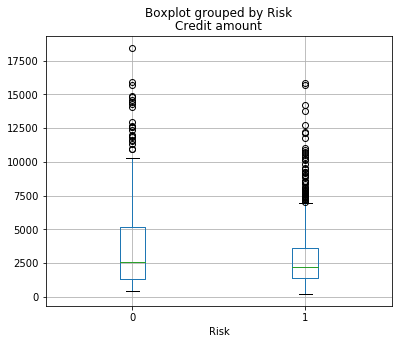

In [135]:
df.boxplot(column = 'Credit amount', by = 'Risk', figsize = (6,5), fontsize= 10) #Boxplot for Credit amout vs Risk


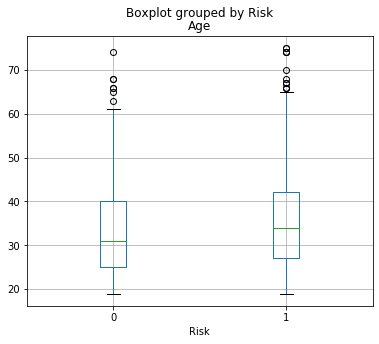

In [136]:
df.boxplot(column = 'Age', by = 'Risk', figsize = (6,5), fontsize= 10) #Boxplot for Age vs Risk